# Finding the Best Markets to Advertise in

In this project I will assume that I'm working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Rawdata:

I could try to search existing data that might be relevant for this purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey) repository.

In [2]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Identifying relevant columns

The goal of this analysis can be broken down into the following questions:

- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning ?

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

#### Columns:
* Demographics:
 * `Age`
 * `CityPopulation`
 * `CountryCitizen`
 * `CountryLive`
 * `EmploymentField`
 * `EmploymentStatus`
 * `Gender`
 * `IsEthnicMinority`
 * `IsReceiveDisabilityBenefits`
 * `LanguageAtHome`
 * `SchoolDegree`
 * `SchoolMajor`
 * `Income`
* Interest
 * `HoursLearning`
 * `MoneyForLearning`
 * `MonthsProgramming`
 * `JobApplyWhen`
 * `JobInterest...` - there are 13 column options here
 * `JobRoleInterest`
* Information Consumption
 * We will not specificy specifically which columns are relevant to this question for space saving purposes, however this ranges from bootcamps to coding competitions to podcasts. These will be useful in determining how to reach these people.
 
We will not hit on all of these in this analysis, however, they may be useful for future analysis if we wanted to know more about these people.

## Sample Representativity

Before diving into our analysis, we will want to ensure that the survey sample data is relevant to our population of interest. At a minimum, we want to ensure that we have data on our core competencies of web and mobile development. As a reminder, we do offer learning solutions in other domains, but those should be considered a bonus. 

We will use the `JobRoleInterest` column, which describes every participant's interest in professional programming roles, to determine sample representivity. Let's start by gnerating a frequency table of this column.

In [5]:
df['JobRoleInterest']

0                                                      NaN
1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
                               ...                        
18170                                                  NaN
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18172                                                  NaN
18173                                                  NaN
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 18175, dtype: object

It is necessary to separate the strings in order to create a proper master frequency table. The separated strings will be appended to the dataframe in the column `JobRoleInterest_ls`

In [6]:
df['JobRoleInterest_ls'] = df['JobRoleInterest'].fillna('Null').astype(str) # convert empty ones to string

# apply lamda func that splits strings into list of strings, separated by ','
df['JobRoleInterest_ls'] = df['JobRoleInterest_ls'].apply(lambda string:string.split(','))

# create frequency table:
topics_freq = {}

for row in df['JobRoleInterest_ls']:
    for val in row:
        if val not in topics_freq:
            topics_freq[val] = 1
        else:
            topics_freq[val] +=1

# convert frequency table to dataframe
topics = pd.DataFrame.from_dict(topics_freq, orient = 'index', columns = ['count'])
topics.reset_index(level = 0, inplace = True) # reset index
topics = topics.rename(columns = {'index':'Topics'}) # rename index column to topics

# get rid of irregularities such as space before or after words
topics['Topics'] = topics['Topics'].str.lstrip().str.rstrip().str.lower()

# there are some duplicate entries. Therefore summarize data into new dataframe using dataframe.groupby()
topics_grouped = pd.DataFrame(topics.groupby('Topics')['count'].sum()) # summarize duplicate topics into new dataframe
topics_grouped.reset_index(level = 0, inplace = True) # reset index
topics_grouped  = topics_grouped.sort_values(by = ['count'], ascending = False).reset_index() # sort indeces in ascending order
topics_grouped = topics_grouped.drop(labels = 'index', axis = 1) # drop indeces
topics_grouped.head(10)

,Topics,count
0,null,11183
1,full-stack web developer,4198
2,front-end web developer,3533
3,back-end web developer,2772
4,mobile developer,2305
5,data scientist,1643
6,game developer,1628
7,user experience designer,1469
8,information security,1326
9,data engineer,1248


## Overview of Courses

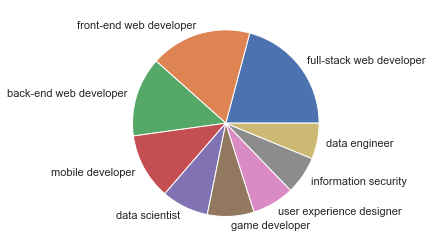

In [35]:
topics_grouped_clean = topics_grouped.head(10).iloc[1:13,:] # get rid of null
plt.pie(topics_grouped_clean['count'], labels = topics_grouped_clean['Topics'])
plt.show()

## Location of Survey Respondants

In [8]:
top_countries_abs = df['CountryLive'].value_counts().sort_values(ascending = False)
top_countries_rel = df['CountryLive'].value_counts(normalize = True).sort_values(ascending = False) * 100

print('top countries in absolute numbers:' + '\n')
print(top_countries_abs[:10])
print('\n')
print('-' * 40 + '\n')
print('top countries in percent:' + '\n')
print(top_countries_rel[:10])

top countries in absolute numbers:

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Germany                      324
Poland                       265
Russia                       263
Australia                    259
France                       228
Name: CountryLive, dtype: int64


----------------------------------------

top countries in percent:

United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Brazil                       2.373500
Germany                      2.112676
Poland                       1.727960
Russia                       1.714919
Australia                    1.688837
France                       1.486698
Name: CountryLive, dtype: float64


The United States accounts for 38% of the market, followed by India at 9%, the UK at 5%, and Canada at 4%. Afterwhich, there is a considerable drop-off in survey response. We can break these into two targeting categories; the Primary Market, the United States, and the Secondary Market, India, Uk, and Canada.

So that we can focus our marketing efforts, we should first consider this primary market and expand to the Secondary market when we are want to reach to new markets.

### Considering Cities within the specific countries
We do not know exactly where in these countries people live, however, we do know the population in the city in which they live. With this information we can decide if cities or rural areas provide more opportunity.

In [9]:
df['CityPopulation'].value_counts(dropna = False).sort_values(ascending = False)

more than 1 million              6534
between 100,000 and 1 million    5276
less than 100,000                3544
NaN                              2821
Name: CityPopulation, dtype: int64

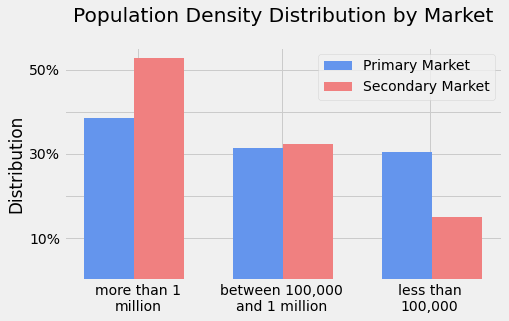

In [10]:
# primary market = US
df_primary = df[df['CountryLive'] == 'United States of America'].copy()

# secondary market = India, UK, CA
df_secondary = df[(df['CountryLive'] == 'India')|
                  (df['CountryLive'] == 'United Kingdom')|
                  (df['CountryLive'] == 'Canada')].copy()

# market densities
df_primary = df_primary['CityPopulation'].value_counts(normalize = True)
df_secondary = df_secondary['CityPopulation'].value_counts(normalize = True)

# set a style for charts
plt.style.use('fivethirtyeight')

# create barplot
N = 3 # the number of columns
ind = np.arange(N) # array of three points
width = .335 # the size of the bars

fig, ax = plt.subplots(figsize=(7,4))

ax.bar(ind, 
        df_primary, 
        width, 
        label = 'Primary Market',
        color = 'cornflowerblue')
ax.bar(ind + width, 
        df_secondary, 
        width, 
        label = 'Secondary Market',
        color = 'lightcoral')

plt.ylabel('Distribution')
plt.legend(loc = 'best')

ax.set_xticks((0.2, 1.16, 2.15))
ax.set_xticklabels(('more than 1\nmillion','between 100,000\nand 1 million', 'less than\n100,000'))

ax.set_yticks((.1, .2,.3,.4, .5))
ax.set_yticklabels(('10%','','30%','', '50%'))

plt.title('Population Density Distribution by Market', y = 1.08)
plt.show()

We see two different trends. The United States, our primary market, is more evenly distributed relative to where our populations live. There are slightly more people in cities of over a million people, but not by much.

In our secondary markets, India, UK, and Canada we see a right skew. Meaning that our targets are more aggregated in larger cities.

Our recommendation is to focus on the the Primary Market, the United States, and to run tests on which demographic area responds more to our offering. One hypothesis might be that people in cities are more likely to pursue in-person learnings, such as bootcamps, and the more dispersed populations want more independent online formats that we offer.

When targeting our secondary markets, we recommend targeting large cities.

## How much Money has a Student spent per Month

In order to find out how much a student has on average spent per month I'll devide the MoneyForLearning column by the MonthsProgramming column. First, however, I'm gonna ensure that all 0-vals are set to 1 to avoid dividing by 0. The explanation for the 0 values in the  MonthsProgramming is that students probably have just started out and not finished a whole month yet. Therefore just dropping the columns wouldn't make sense for the analysis

 cleaning `MonthsProgrammingColumn`

In [11]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0) # reload df to start from scratch
df['MonthsProgramming'].value_counts(dropna=False).sort_index()

0.0       578
1.0      1697
2.0      1338
3.0      1333
4.0       732
         ... 
600.0       2
720.0       1
743.0       2
744.0      12
NaN      1091
Name: MonthsProgramming, Length: 155, dtype: int64

In [12]:
# to avoid dividing by 0, replace 0-vals in MonthsProgramming col with 1
df['MonthsProgramming'].replace(0,1, inplace = True) # replace 0 with 1
df['MonthsProgramming'] = df['MonthsProgramming'].fillna(1) # fillna with 1

df['MonthsProgramming'].value_counts(dropna=False).sort_index()

1.0      3366
2.0      1338
3.0      1333
4.0       732
5.0       621
         ... 
572.0       1
600.0       2
720.0       1
743.0       2
744.0      12
Name: MonthsProgramming, Length: 153, dtype: int64

cleaning `MoneyForLearning` Column 

In [13]:
df['MoneyForLearning'].value_counts(dropna=False).sort_index()

0.0         7985
1.0           22
2.0            5
3.0            8
4.0            7
            ... 
120000.0       1
170000.0       1
200000.0       2
210000.0       1
NaN         1598
Name: MoneyForLearning, Length: 334, dtype: int64

In [14]:
# to avoid dividing by 0, replace 0-vals in MonthsProgramming col with 1
df['MoneyForLearning'].replace(0,1, inplace = True) # replace 0 with 1
df['MoneyForLearning'] = df['MoneyForLearning'].fillna(1) # fillna with 1

df['MoneyForLearning'].value_counts(dropna=False).sort_index()

1.0         9605
2.0            5
3.0            8
4.0            7
5.0           40
            ... 
100000.0       5
120000.0       1
170000.0       1
200000.0       2
210000.0       1
Name: MoneyForLearning, Length: 332, dtype: int64

cleaning `CountryLive` Column 

In [15]:
df['CountryLive'].value_counts(dropna=False).sort_index()

Afghanistan                6
Albania                   17
Algeria                   21
Angola                     5
Anguilla                   1
                        ... 
Virgin Islands (USA)      15
Yemen                      2
Zambia                     5
Zimbabwe                  11
NaN                     2839
Name: CountryLive, Length: 173, dtype: int64

In [16]:
df = df[df["CountryLive"].str.contains('0') == False]
df['CountryLive'].value_counts(dropna=False).sort_index()

Afghanistan                  6
Albania                     17
Algeria                     21
Angola                       5
Anguilla                     1
                            ..
Virgin Islands (British)     1
Virgin Islands (USA)        15
Yemen                        2
Zambia                       5
Zimbabwe                    11
Name: CountryLive, Length: 172, dtype: int64

### Calculating average Spent per Month

- US
- India
- UK
- CA

The US has been specified as the primary market whereas the UK,CA and India can summarized as the secondary market.

In [17]:
# copy relevant into df_clean for easier data handling
df_clean = df[['CountryLive','MonthsProgramming', 'MoneyForLearning', 'AttendedBootcamp']].copy()

# filter only countries of interest
df_clean = df_clean[(df_clean['CountryLive'] == 'United States of America')|
                   (df_clean['CountryLive'] == 'India')|
                   (df_clean['CountryLive'] == 'United Kingdom')|
                   (df_clean['CountryLive'] == 'Canada')]


# compute column that describes money spent per month
df_clean['SpentPerMonth'] = df_clean['MoneyForLearning'] / df_clean['MonthsProgramming']
df_clean.head()

,CountryLive,MonthsProgramming,MoneyForLearning,AttendedBootcamp,SpentPerMonth
0,Canada,6.0,150.0,0.0,25.000000
1,United States of America,6.0,80.0,0.0,13.333333
2,United States of America,5.0,1000.0,0.0,200.000000
5,Canada,12.0,200.0,0.0,16.666667
6,United Kingdom,12.0,1.0,0.0,0.083333


In [18]:
# check how many cols have no value
print('amount of rows with 0 values: ' + ' '+ str(df_clean['SpentPerMonth'].isnull().sum()))

amount of rows with 0 values:  0


In [19]:
df_clean['SpentPerMonth'].value_counts(dropna=False).sort_index()

0.001344        5
0.002083        1
0.002222        1
0.002451        1
0.002778        4
               ..
25000.000000    1
45000.000000    1
50000.000000    1
60000.000000    2
80000.000000    1
Name: SpentPerMonth, Length: 757, dtype: int64

### Calculating average Spent per Month per country

In [20]:
# using for loop
countries =['United States of America', 'India', 'United Kingdom', 'Canada']

mean_per_month = {} # empty dict to be filled with mean results

for i, country in enumerate(countries):
    temp = df_clean[df_clean['CountryLive'] == country] # filter for country
    mean = temp['SpentPerMonth'].mean() # calculate mean of spentpermonth
    print(country + ': ' + str(round(mean))) # print result
    mean_per_month[country] = mean # append result to mean_per_month dictionary

United States of America: 230
India: 59
United Kingdom: 68
Canada: 128


In [21]:
# using df.groupby() - more elegant solution
df_country_mean = df_clean.groupby(['CountryLive'])['SpentPerMonth'].mean()
df_country_mean

CountryLive
Canada                      127.748201
India                        59.486255
United Kingdom               67.589434
United States of America    229.516961
Name: SpentPerMonth, dtype: float64

## Visualization of Expenses per Student per Month for each Country

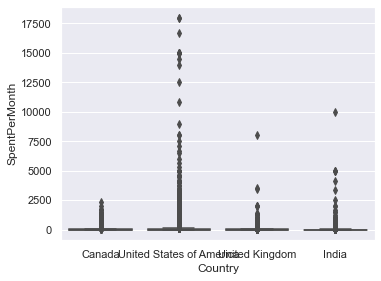

In [36]:
sns.boxplot(data=df_clean, x = 'CountryLive', y = 'SpentPerMonth')
plt.xlabel('Country')
sns.set(rc={'figure.figsize':(20,4)})
plt.show()


It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month USD 50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over USD 20,000 per month.

In [23]:
# Isolate only those participants who spend less than 10000 per month
df_clean = df_clean[df_clean['SpentPerMonth'] < 20000]

df_clean['SpentPerMonth'].value_counts(dropna=False).sort_index()

0.001344        5
0.002083        1
0.002222        1
0.002451        1
0.002778        4
               ..
14000.000000    1
14500.000000    1
15000.000000    5
16666.666667    1
18000.000000    2
Name: SpentPerMonth, Length: 751, dtype: int64

In [24]:
# Isolate only those participants who spend less than 10000 per month
df_clean = df_clean[df_clean['SpentPerMonth'] < 20000]

#recompute mean values
df_country_mean = df_clean.groupby(['CountryLive'])['SpentPerMonth'].mean()
df_country_mean

CountryLive
Canada                      127.748201
India                        59.486255
United Kingdom               67.589434
United States of America    171.011882
Name: SpentPerMonth, dtype: float64

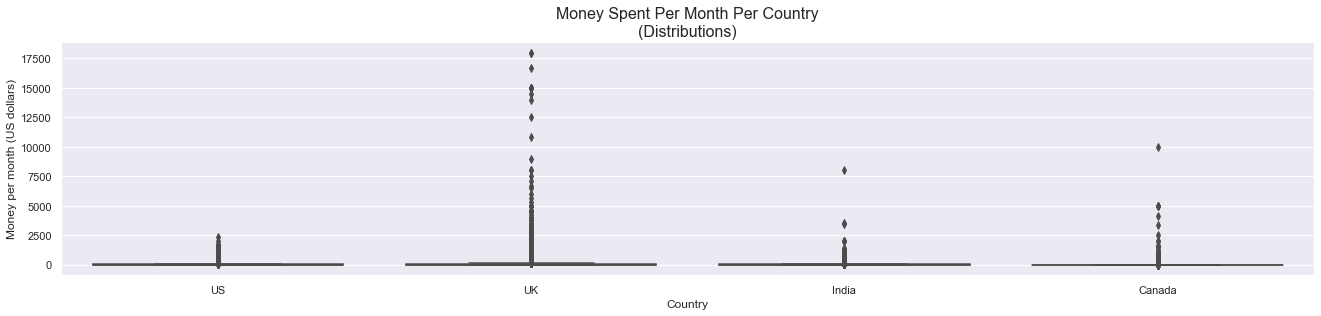

In [37]:
# Box plots to visualize distributions
sns.boxplot(y = 'SpentPerMonth', x = 'CountryLive',
            data = df_clean)
sns.set(rc={'figure.figsize':(20,4)})
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [26]:
# Inspect the extreme outliers for India
india_outliers = df_clean[
    (df_clean['CountryLive'] == 'India') & 
    (df_clean['SpentPerMonth'] >= 2500)]
india_outliers

,CountryLive,MonthsProgramming,MoneyForLearning,AttendedBootcamp,SpentPerMonth
1728,India,4.0,20000.0,0.0,5000.000000
1755,India,15.0,50000.0,0.0,3333.333333
2044,India,1.0,2500.0,0.0,2500.000000
7989,India,1.0,5000.0,0.0,5000.000000
8126,India,1.0,5000.0,0.0,5000.000000
13398,India,2.0,20000.0,0.0,10000.000000
15587,India,24.0,100000.0,0.0,4166.666667


In [27]:
# drop india outliers
no_bootcamp = df_clean[
    (df_clean['CountryLive'] == 'United States of America') & 
    (df_clean['SpentPerMonth'] >= 6000) &
    (df_clean['MonthsProgramming'] == 0)
]

df_clean = df_clean.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = df_clean[
    (df_clean['CountryLive'] == 'United States of America') & 
    (df_clean['SpentPerMonth'] >= 6000) &
    (df_clean['SpentPerMonth'] <= 3)
]

df_clean = df_clean.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [28]:
# Examine the extreme outliers for Canada
canada_outliers = df_clean[
    (df_clean['CountryLive'] == 'Canada') & 
    (df_clean['SpentPerMonth'] > 4500)]

canada_outliers

,CountryLive,MonthsProgramming,MoneyForLearning,AttendedBootcamp,SpentPerMonth
13659,Canada,2.0,10000.0,1.0,5000.0
14422,Canada,1.0,5000.0,0.0,5000.0
16921,Canada,1.0,5000.0,0.0,5000.0


In [29]:
# Remove the extreme outliers for Canada
df_clean = df_clean.drop(canada_outliers.index)

Let's recompute the mean values and generate the final box plots.

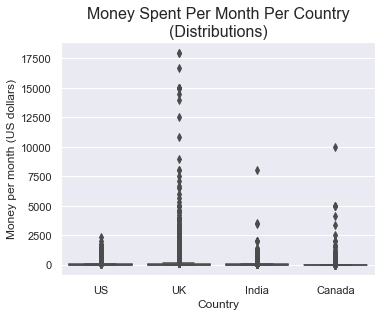

In [30]:
# Visualize the distributions again
sns.boxplot(y = 'SpentPerMonth', x = 'CountryLive',
            data = df_clean)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two best Markets

In [31]:
# Frequency table for the 'CountryLive' column
df_clean['CountryLive'].value_counts(normalize = True) * 100

United States of America    67.617489
India                       16.366612
United Kingdom               8.849661
Canada                       7.166238
Name: CountryLive, dtype: float64

# Conclusion
In this project, I analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion I was able to reache is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.